In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [7]:
#Load data
telco_df = pd.read_excel("Telco_Customer_Churn.xlsx")

In [8]:
#Change column names
telco_df.columns = telco_df.columns.str.replace(' ', '_')


In [9]:
#Print the head
telco_df.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Get an Array of all the column names
telco_df.columns.values

array(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection',
       'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charges',
       'Total_Charges', 'Churn'], dtype=object)

In [11]:
# Checking the data types of all the columns
telco_df.dtypes

Customer_ID           object
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [12]:
# Converting Total Charges to a numerical data type.
telco_df.Total_Charges = pd.to_numeric(telco_df.Total_Charges, errors='coerce')
telco_df.isnull().sum()

Customer_ID           0
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn                 0
dtype: int64

In [13]:
#Removing missing values 
telco_df.dropna(inplace = True)

#Remove customer IDs from the data set
df = telco_df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Tenure,Monthly_Charges,Total_Charges,Churn,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [14]:
# Checking the data types of all the columns
df_dummies.dtypes

Tenure                                        int64
Monthly_Charges                             float64
Total_Charges                               float64
Churn                                         int64
Gender_Female                                 uint8
Gender_Male                                   uint8
Senior_Citizen_No                             uint8
Senior_Citizen_Yes                            uint8
Partner_No                                    uint8
Partner_Yes                                   uint8
Dependents_No                                 uint8
Dependents_Yes                                uint8
Phone_Service_No                              uint8
Phone_Service_Yes                             uint8
Multiple_Lines_No                             uint8
Multiple_Lines_No phone service               uint8
Multiple_Lines_Yes                            uint8
Internet_Service_DSL                          uint8
Internet_Service_Fiber optic                  uint8
Internet_Ser

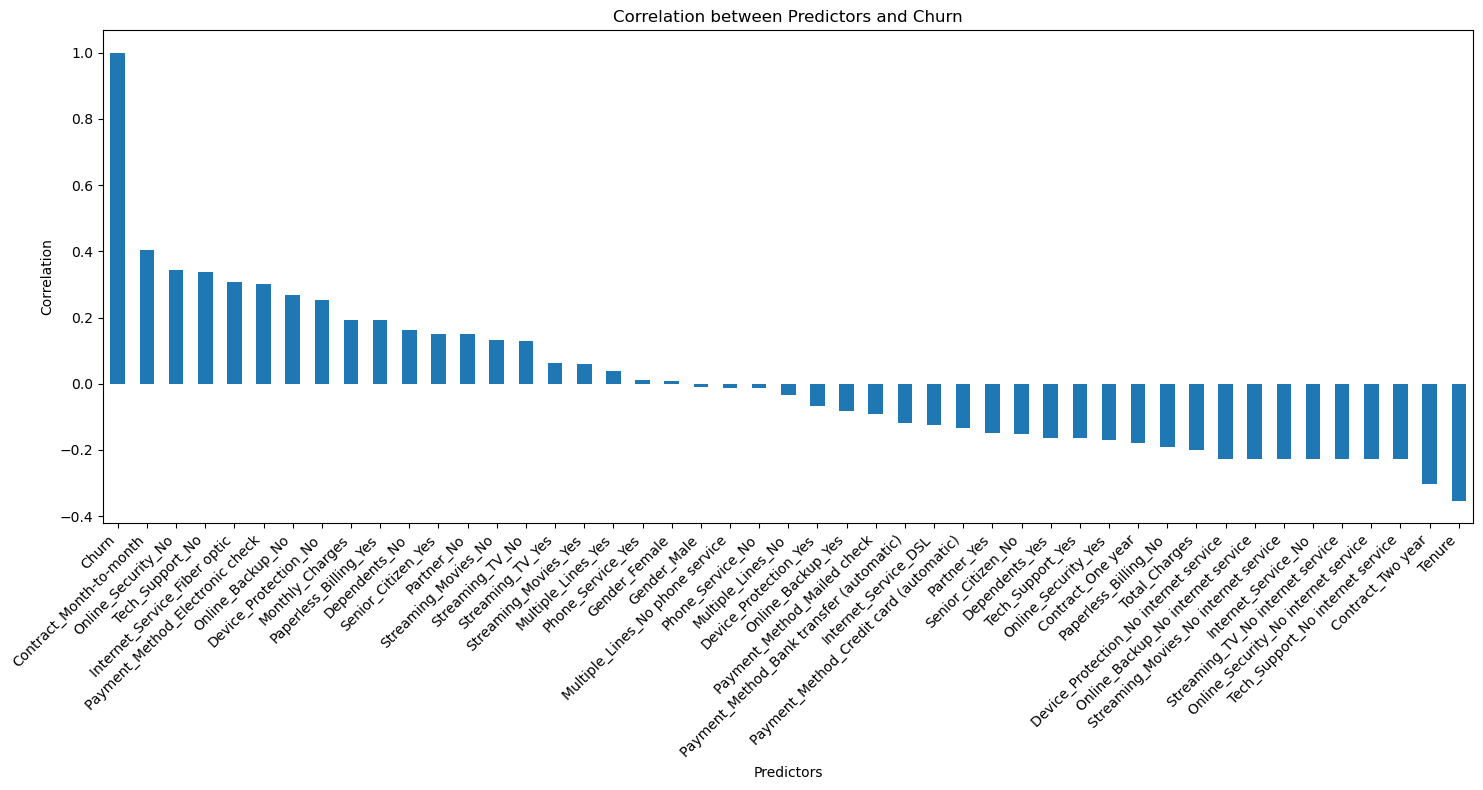

In [15]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
ax = df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Correlation between Predictors and Churn')
plt.xlabel('Predictors')
plt.ylabel('Correlation')
plt.tight_layout()

plt.savefig('correlation_plot.png', dpi=300)
plt.show()


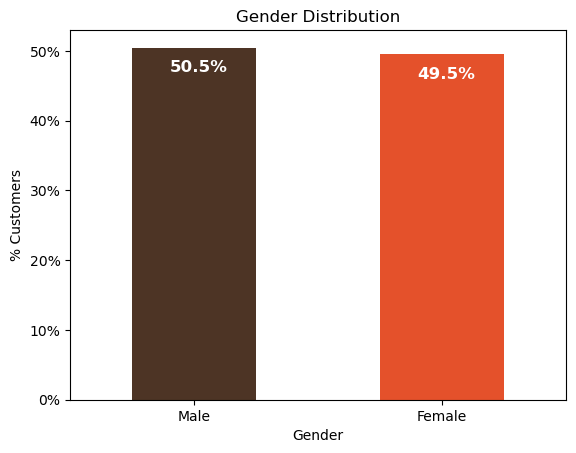

In [16]:
#Gender Distribution

colors = ['#4D3425','#E4512B']
ax = (telco_df['Gender'].value_counts()*100.0 /len(telco_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

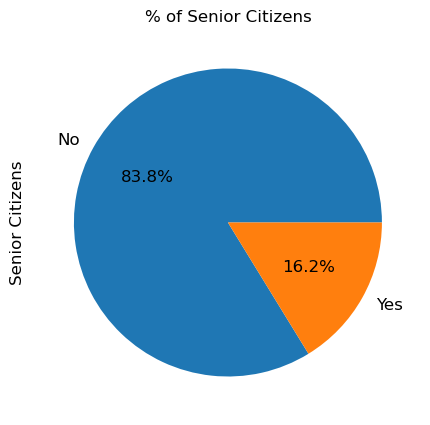

In [17]:
#Percentage of Senior Citizens
ax = (telco_df['Senior_Citizen'].value_counts()*100.0 /len(telco_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

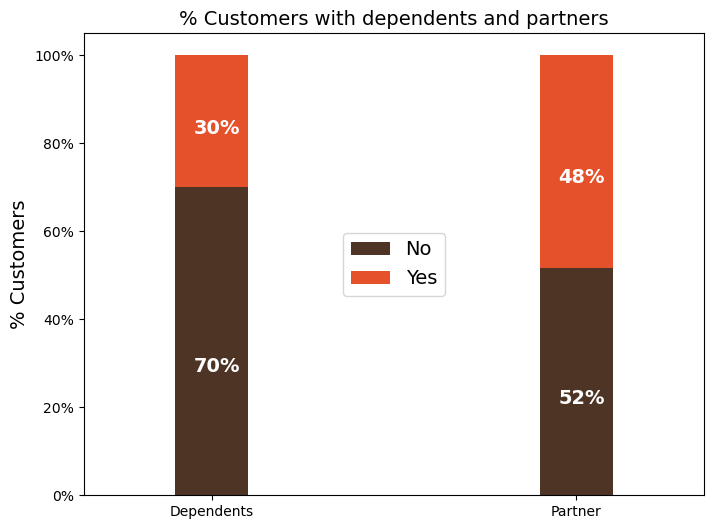

In [18]:
#Partner and Dependent Status

df2 = pd.melt(telco_df, id_vars=['Customer_ID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telco_df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'Customer_ID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

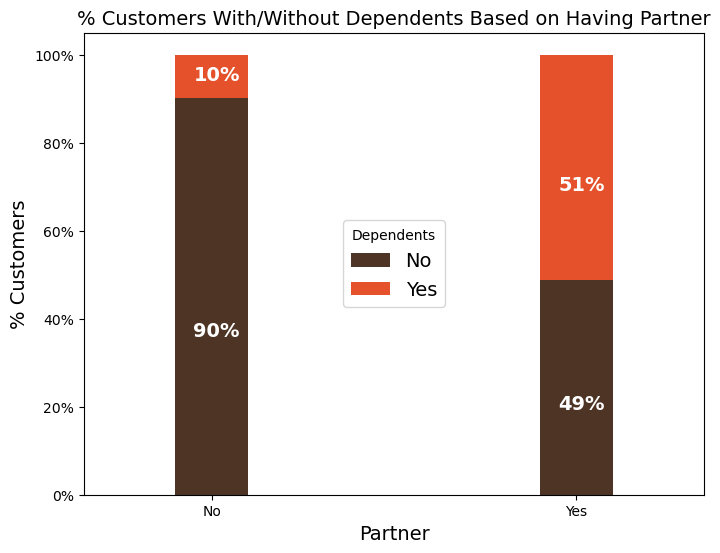

In [19]:
# Churn of Customers With/Without Dependents Based on Having Partner

colors = ['#4D3425','#E4512B']
partner_dependents = telco_df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers With/Without Dependents Based on Having Partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by Tenure')

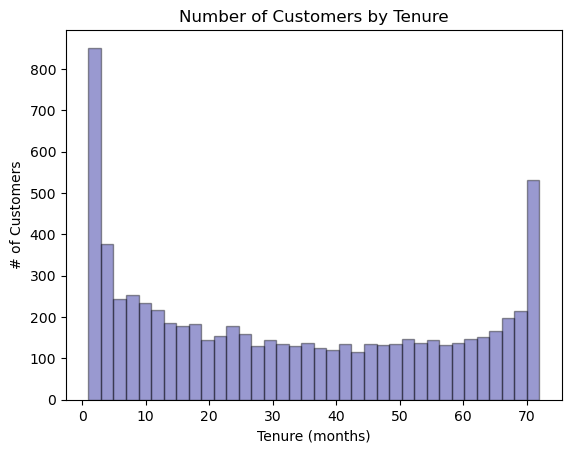

In [20]:
# Number of customers by tenure

ax = sns.distplot(telco_df['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by Tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

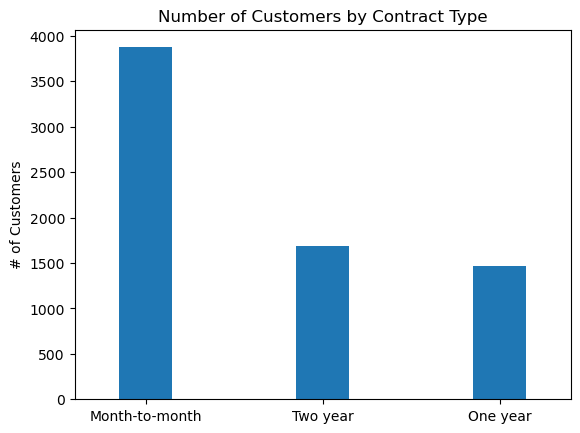

In [21]:
#Number of Customers by Contract Type
ax = telco_df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('Number of Customers by Contract Type')

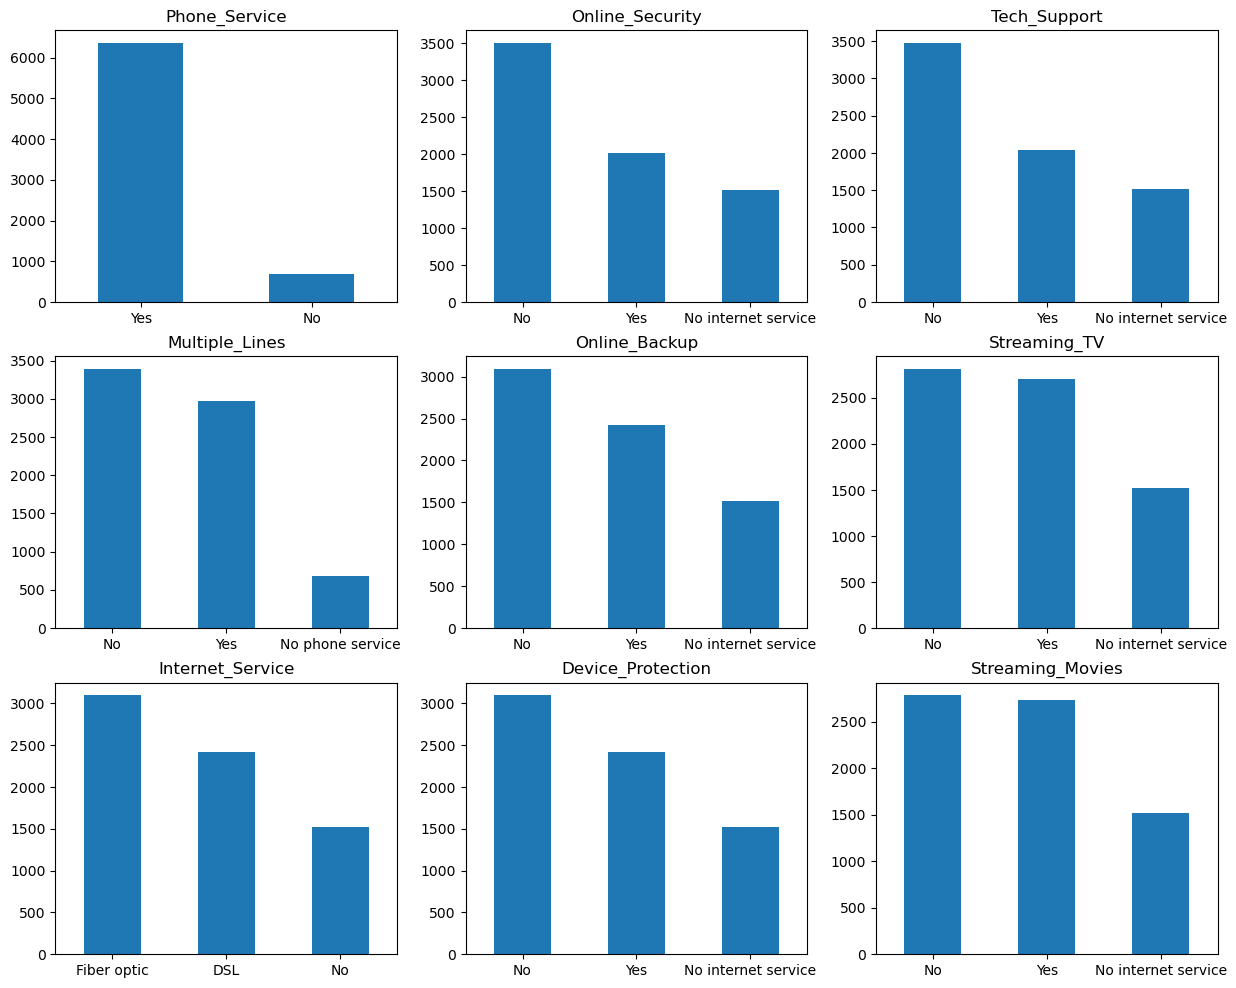

In [22]:
#Number of customers based on service
services = ['Phone_Service','Multiple_Lines','Internet_Service','Online_Security',
           'Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telco_df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**Churn**

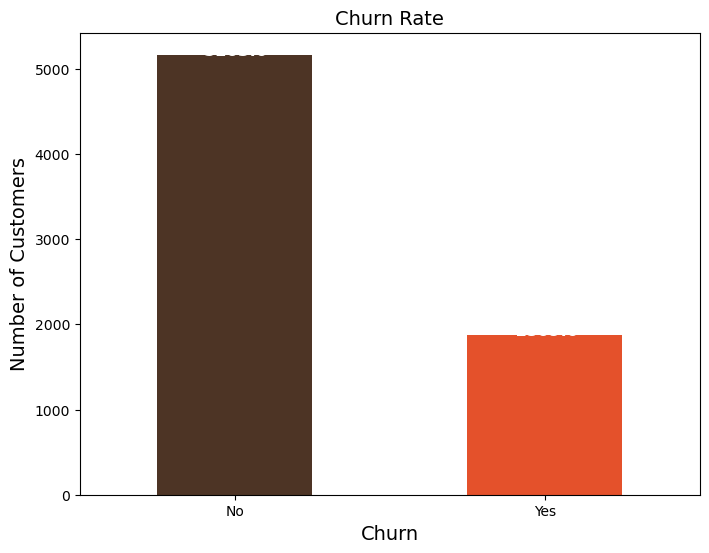

In [23]:
# set the colors for the bars
colors = ['#4D3425','#E4512B']

# create a bar plot of the churn column in the telco_df dataframe,
# showing the number of customers that churned
ax = (telco_df['Churn'].value_counts()).plot(kind='bar',
                                                  stacked=True,
                                                  rot=0,
                                                  color=colors,
                                                  figsize=(8,6))

# set the y-axis label to "Number of Customers"
ax.set_ylabel('Number of Customers', size=14)

# set the x-axis label to "Churn"
ax.set_xlabel('Churn', size=14)

# set the title of the plot to "Churn Rate"
ax.set_title('Churn Rate', size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# calculate the total number of customers
total = sum(totals)

# add labels to the bars showing the number of customers that churned
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round(i.get_height(), 0)),
            fontsize=12,
            color='white',
            weight='bold')





**Churn Rate**

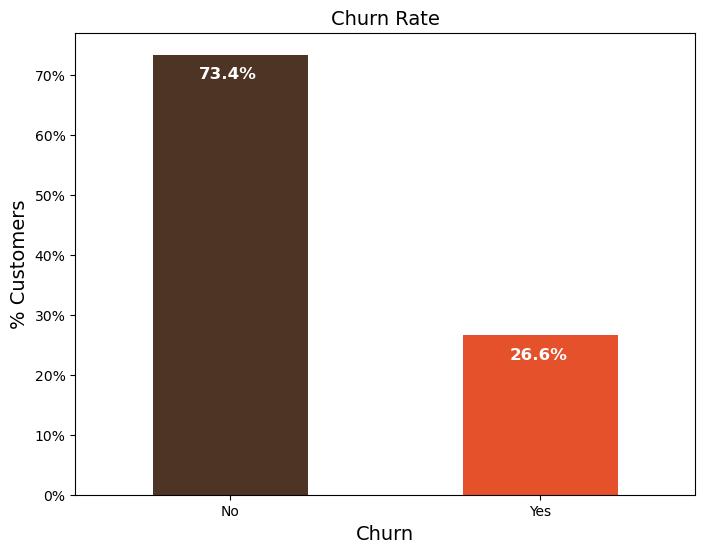

In [24]:
colors = ['#4D3425','#E4512B']
ax = (telco_df['Churn'].value_counts()*100.0 /len(telco_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**i.) Churn vs Tenure**


<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

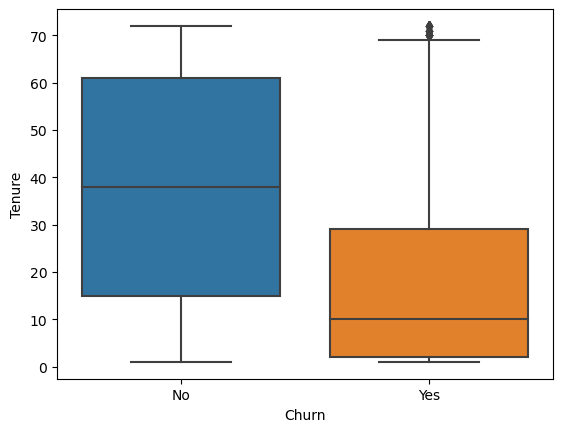

In [25]:
sns.boxplot(x = telco_df.Churn, y = telco_df.Tenure)

**ii.) Churn by Contract Type**:

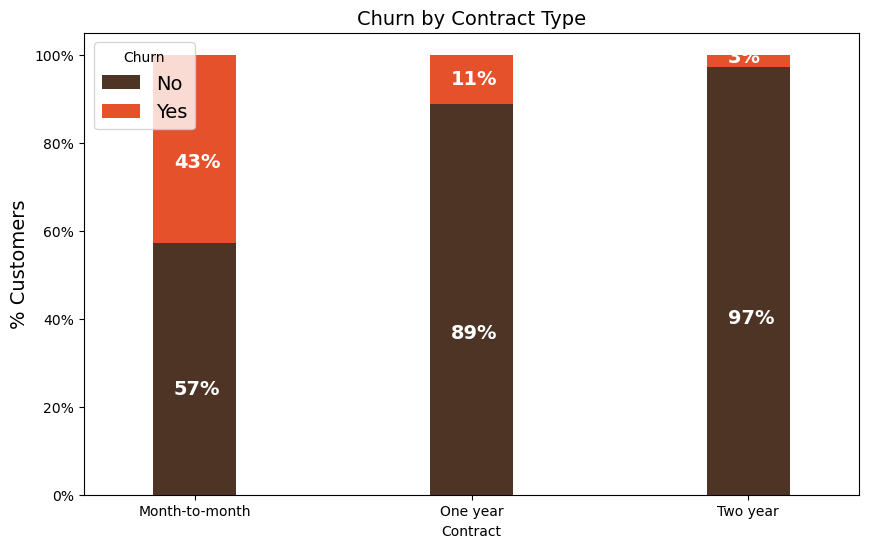

In [26]:
colors = ['#4D3425','#E4512B']
contract_churn = telco_df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**iii.) Churn by Seniority**:

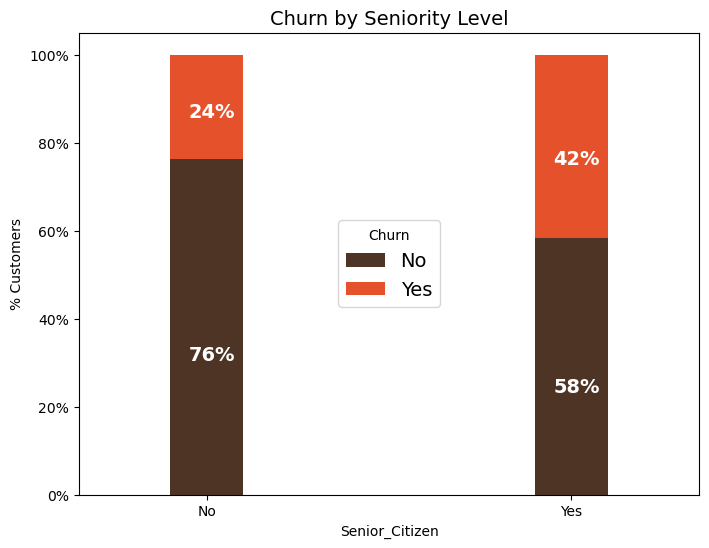

In [27]:
colors = ['#4D3425','#E4512B']
seniority_churn = telco_df.groupby(['Senior_Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Churn by Monthly Charges**

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

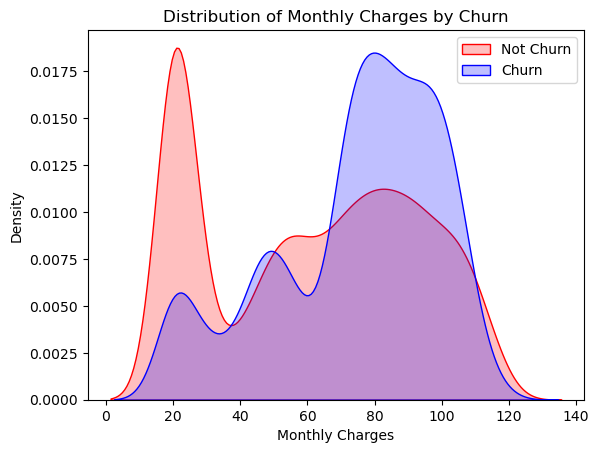

In [28]:
ax = sns.kdeplot(telco_df.Monthly_Charges[(telco_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_df.Monthly_Charges[(telco_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

**v.) Churn by Total Charges**:

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

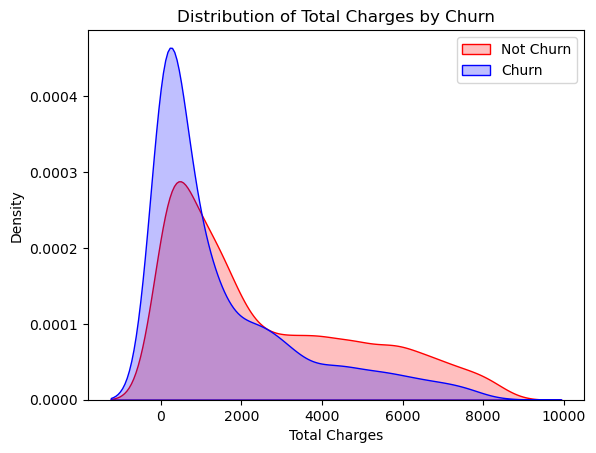

In [29]:
ax = sns.kdeplot(telco_df.Total_Charges[(telco_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_df.Total_Charges[(telco_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

**CLASSIFCATION MODELS**
** **
**1. Logistic Regression**

In [30]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
predictors = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = predictors

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
result = lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
# Print the prediction accuracy & Classification Report
acc_lg = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc_lg)
print('Classification Report:')
print(classification_report(y_test, y_pred))


# To get the weights of the top 10 variables

weights = pd.Series(lg.coef_[0],
                 index=X.columns.values)

# Get the top 10 absolute feature importances and names
top_10_importances = weights.abs().sort_values(ascending=False)[:10]
top_10_names = top_10_importances.index

# Create a dictionary to map colors to coefficients
colors = {True: 'b', False: 'r'}

# Plot the top 10 feature importances
fig, ax = plt.subplots()
for i, name in enumerate(top_10_names):
    color = colors[weights[name] > 0]
    ax.bar(i, weights[name], color=color)
ax.set_xticks(range(len(top_10_names)))
ax.set_xticklabels(top_10_names, rotation=45, ha='right')
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance Score')
ax.set_title('Top 10 Predictors With Highest Impact')
plt.show()

NameError: name 'accuracy_score' is not defined

In [399]:
#Prediction Test for last customer
new_customer = pd.DataFrame({
    'Tenure': [66],
    'Monthly_Charges': [105.65],
    'Total_Charges': [6844.5],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Senior_Citizen_No': [1],
    'Senior_Citizen_Yes': [0],
    'Partner_No': [1],
    'Partner_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0],
    'Phone_Service_No': [0],
    'Phone_Service_Yes': [1],
    'Multiple_Lines_No': [0],
    'Multiple_Lines_No phone service': [0],
    'Multiple_Lines_Yes': [1],
    'Internet_Service_DSL': [0],
    'Internet_Service_Fiber optic': [1],
    'Internet_Service_No': [0],
    'Online_Security_No': [1],
    'Online_Security_Yes': [0],
    'Online_Security_No internet service': [0],
    'Online_Backup_No': [1],
    'Online_Backup_Yes': [0],
    'Online_Backup_No internet service': [0],
    'Device_Protection_No': [1],
    'Device_Protection_Yes': [0],
    'Device_Protection_No internet service': [0],
    'Tech_Support_No': [1],
    'Tech_Support_Yes': [0],
    'Tech_Support_No internet service': [0],
    'Streaming_TV_No': [0],
    'Streaming_TV_No internet service': [0],
    'Streaming_TV_Yes': [1],
    'Streaming_Movies_No': [0],
    'Streaming_Movies_Yes': [1],
    'Streaming_Movies_No internet service': [0],
    'Contract_Month-to-month': [0],
    'Contract_One year': [0],
    'Contract_Two year': [1],
    'Paperless_Billing_No': [0],
    'Paperless_Billing_Yes': [1],
    'Payment_Method_Bank transfer (automatic)': [1],
    'Payment_Method_Credit card (automatic)': [0],
    'Payment_Method_Electronic check': [0],
    'Payment_Method_Mailed check': [0]})

new_customer['Streaming_Movies_No internet service'] = 0
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Scale the new customer data
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Predict the churn for the new customer using the trained logistic regression model
churn_prediction = lg.predict(new_customer_scaled)

# Print the churn prediction for the new customer
if churn_prediction[0] == 1:
    print("Churn prediction for new customer: Yes")
else:
    print("Churn prediction for new customer: No")



Churn prediction for new customer: No


/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


**2. Random Forest**

In [334]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc_rf)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8081023454157783
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1052
           1       0.66      0.48      0.56       355

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



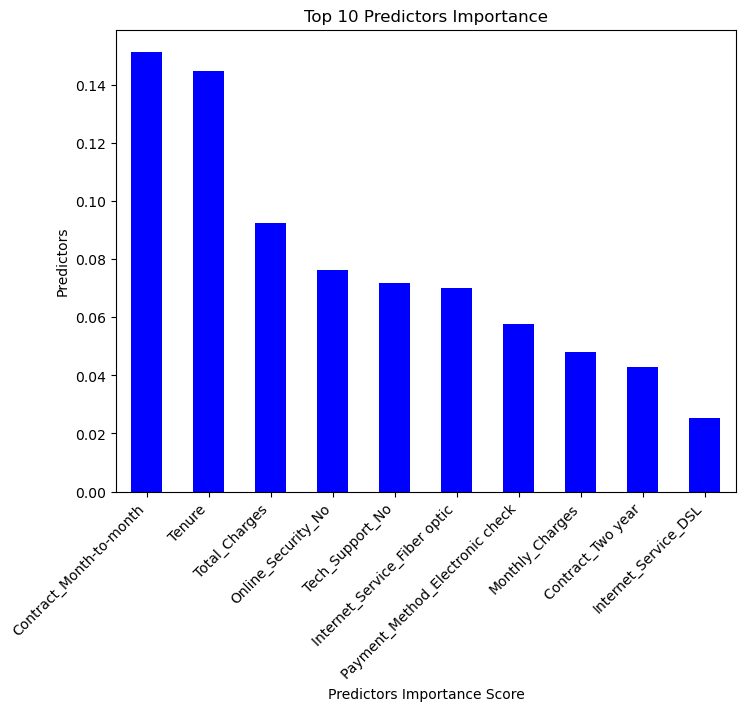

In [360]:
# To get the importance of the top 10 variables

importances = rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
plt.figure(figsize=(8, 6))
ax = weights.sort_values()[-10:].sort_values(ascending=False).plot(kind='bar', color=np.where(weights<0, 'red', 'blue'))
ax.set_xlabel('Predictors Importance Score')
ax.set_ylabel('Predictors')
plt.xticks(rotation=45, ha='right')
ax.set_title('Top 10 Predictors Importance')
plt.show()



In [405]:
#Prediction Test for last customer
new_customer = pd.DataFrame({
    'Tenure': [66],
    'Monthly_Charges': [105.65],
    'Total_Charges': [6844.5],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Senior_Citizen_No': [1],
    'Senior_Citizen_Yes': [0],
    'Partner_No': [1],
    'Partner_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0],
    'Phone_Service_No': [0],
    'Phone_Service_Yes': [1],
    'Multiple_Lines_No': [0],
    'Multiple_Lines_No phone service': [0],
    'Multiple_Lines_Yes': [1],
    'Internet_Service_DSL': [0],
    'Internet_Service_Fiber optic': [1],
    'Internet_Service_No': [0],
    'Online_Security_No': [1],
    'Online_Security_Yes': [0],
    'Online_Security_No internet service': [0],
    'Online_Backup_No': [1],
    'Online_Backup_Yes': [0],
    'Online_Backup_No internet service': [0],
    'Device_Protection_No': [1],
    'Device_Protection_Yes': [0],
    'Device_Protection_No internet service': [0],
    'Tech_Support_No': [1],
    'Tech_Support_Yes': [0],
    'Tech_Support_No internet service': [0],
    'Streaming_TV_No': [0],
    'Streaming_TV_No internet service': [0],
    'Streaming_TV_Yes': [1],
    'Streaming_Movies_No': [0],
    'Streaming_Movies_Yes': [1],
    'Streaming_Movies_No internet service': [0],
    'Contract_Month-to-month': [0],
    'Contract_One year': [0],
    'Contract_Two year': [1],
    'Paperless_Billing_No': [0],
    'Paperless_Billing_Yes': [1],
    'Payment_Method_Bank transfer (automatic)': [1],
    'Payment_Method_Credit card (automatic)': [0],
    'Payment_Method_Electronic check': [0],
    'Payment_Method_Mailed check': [0]})

new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Scale the new customer data
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Predict the churn for the new customer using the trained logistic regression model
churn_prediction = rf.predict(new_customer_scaled)

# Print the churn prediction for the new customer
if churn_prediction[0] == 1:
    print("Churn prediction for new customer: Yes")
else:
    print("Churn prediction for new customer: No")



Churn prediction for new customer: No


/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


**3. CART**

In [337]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit decision tree classifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate accuracy score
acc_cart = accuracy_score(y_test, y_pred)

# Calculate the accuracy score and classification report
print('Accuracy Score:', acc_cart)
print('Classification Report:')
print(classification_report(y_test, y_pred))




Accuracy Score: 0.7213270142180095
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1555
           1       0.47      0.52      0.49       555

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



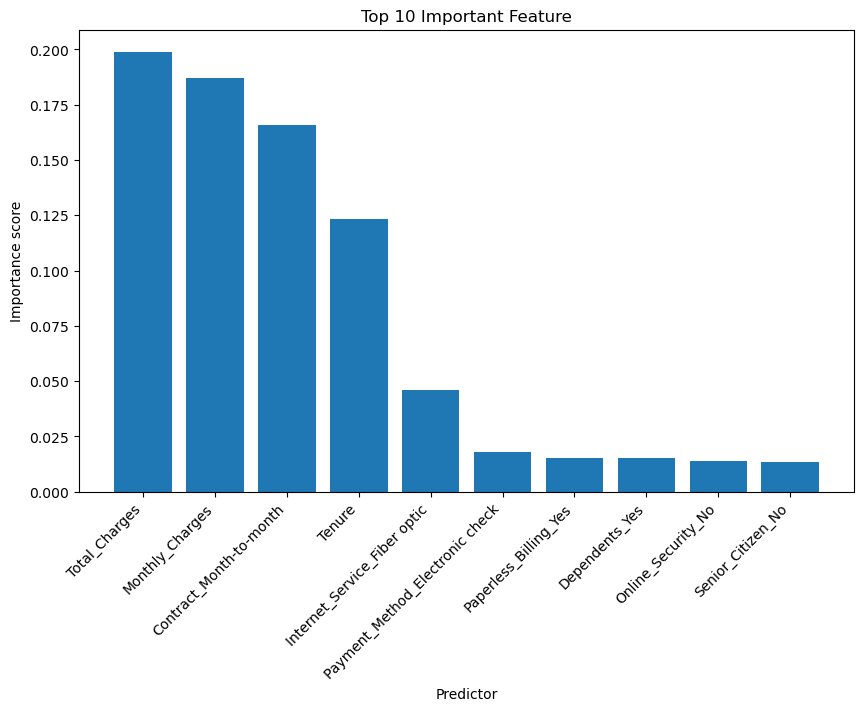

In [342]:
# Get the feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Get the top 10 feature importances and names
top_10_importances = importances[indices][:10]
top_10_names = names[:10]

    
# Plot the top 10 feature by importances
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, top_10_importances)
plt.title('Top 10 Important Feature')
plt.xlabel('Predictor')
plt.ylabel('Importance score')
plt.xticks(rotation=45, ha='right')

plt.show()

In [404]:
#Prediction Test for last customer
new_customer = pd.DataFrame({
    'Tenure': [66],
    'Monthly_Charges': [105.65],
    'Total_Charges': [6844.5],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Senior_Citizen_No': [1],
    'Senior_Citizen_Yes': [0],
    'Partner_No': [1],
    'Partner_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0],
    'Phone_Service_No': [0],
    'Phone_Service_Yes': [1],
    'Multiple_Lines_No': [0],
    'Multiple_Lines_No phone service': [0],
    'Multiple_Lines_Yes': [1],
    'Internet_Service_DSL': [0],
    'Internet_Service_Fiber optic': [1],
    'Internet_Service_No': [0],
    'Online_Security_No': [1],
    'Online_Security_Yes': [0],
    'Online_Security_No internet service': [0],
    'Online_Backup_No': [1],
    'Online_Backup_Yes': [0],
    'Online_Backup_No internet service': [0],
    'Device_Protection_No': [1],
    'Device_Protection_Yes': [0],
    'Device_Protection_No internet service': [0],
    'Tech_Support_No': [1],
    'Tech_Support_Yes': [0],
    'Tech_Support_No internet service': [0],
    'Streaming_TV_No': [0],
    'Streaming_TV_No internet service': [0],
    'Streaming_TV_Yes': [1],
    'Streaming_Movies_No': [0],
    'Streaming_Movies_Yes': [1],
    'Streaming_Movies_No internet service': [0],
    'Contract_Month-to-month': [0],
    'Contract_One year': [0],
    'Contract_Two year': [1],
    'Paperless_Billing_No': [0],
    'Paperless_Billing_Yes': [1],
    'Payment_Method_Bank transfer (automatic)': [1],
    'Payment_Method_Credit card (automatic)': [0],
    'Payment_Method_Electronic check': [0],
    'Payment_Method_Mailed check': [0]})

new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Scale the new customer data
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Predict the churn for the new customer using the trained logistic regression model
churn_prediction = clf.predict(new_customer_scaled)

# Print the churn prediction for the new customer
if churn_prediction[0] == 1:
    print("Churn prediction for new customer: Yes")
else:
    print("Churn prediction for new customer: No")



Churn prediction for new customer: No


/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


**4. KNN**

In [345]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
acc_knn = accuracy_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7454976303317535
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1555
           1       0.52      0.52      0.52       555

    accuracy                           0.75      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110



/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
#Prediction Test for last customer
new_customer = pd.DataFrame({
    'Tenure': [66],
    'Monthly_Charges': [105.65],
    'Total_Charges': [6844.5],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Senior_Citizen_No': [1],
    'Senior_Citizen_Yes': [0],
    'Partner_No': [1],
    'Partner_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0],
    'Phone_Service_No': [0],
    'Phone_Service_Yes': [1],
    'Multiple_Lines_No': [0],
    'Multiple_Lines_No phone service': [0],
    'Multiple_Lines_Yes': [1],
    'Internet_Service_DSL': [0],
    'Internet_Service_Fiber optic': [1],
    'Internet_Service_No': [0],
    'Online_Security_No': [1],
    'Online_Security_Yes': [0],
    'Online_Security_No internet service': [0],
    'Online_Backup_No': [1],
    'Online_Backup_Yes': [0],
    'Online_Backup_No internet service': [0],
    'Device_Protection_No': [1],
    'Device_Protection_Yes': [0],
    'Device_Protection_No internet service': [0],
    'Tech_Support_No': [1],
    'Tech_Support_Yes': [0],
    'Tech_Support_No internet service': [0],
    'Streaming_TV_No': [0],
    'Streaming_TV_No internet service': [0],
    'Streaming_TV_Yes': [1],
    'Streaming_Movies_No': [0],
    'Streaming_Movies_Yes': [1],
    'Streaming_Movies_No internet service': [0],
    'Contract_Month-to-month': [0],
    'Contract_One year': [0],
    'Contract_Two year': [1],
    'Paperless_Billing_No': [0],
    'Paperless_Billing_Yes': [1],
    'Payment_Method_Bank transfer (automatic)': [1],
    'Payment_Method_Credit card (automatic)': [0],
    'Payment_Method_Electronic check': [0],
    'Payment_Method_Mailed check': [0]})

new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Scale the new customer data
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Predict the churn for the new customer using the trained logistic regression model
churn_prediction = knn.predict(new_customer_scaled)

# Print the churn prediction for the new customer
if churn_prediction[0] == 1:
    print("Churn prediction for new customer: Yes")
else:
    print("Churn prediction for new customer: No")



C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


NameError: name 'knn' is not defined

**5. Naive Bayes**

In [346]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model on the training data
mnb.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = mnb.predict(X_test)

# Calculate the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
acc_mnb = accuracy_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.709478672985782
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1549
           1       0.47      0.81      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.71      0.73      2110



In [406]:
#Prediction Test for last customer
new_customer = pd.DataFrame({
    'Tenure': [66],
    'Monthly_Charges': [105.65],
    'Total_Charges': [6844.5],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'Senior_Citizen_No': [1],
    'Senior_Citizen_Yes': [0],
    'Partner_No': [1],
    'Partner_Yes': [0],
    'Dependents_No': [1],
    'Dependents_Yes': [0],
    'Phone_Service_No': [0],
    'Phone_Service_Yes': [1],
    'Multiple_Lines_No': [0],
    'Multiple_Lines_No phone service': [0],
    'Multiple_Lines_Yes': [1],
    'Internet_Service_DSL': [0],
    'Internet_Service_Fiber optic': [1],
    'Internet_Service_No': [0],
    'Online_Security_No': [1],
    'Online_Security_Yes': [0],
    'Online_Security_No internet service': [0],
    'Online_Backup_No': [1],
    'Online_Backup_Yes': [0],
    'Online_Backup_No internet service': [0],
    'Device_Protection_No': [1],
    'Device_Protection_Yes': [0],
    'Device_Protection_No internet service': [0],
    'Tech_Support_No': [1],
    'Tech_Support_Yes': [0],
    'Tech_Support_No internet service': [0],
    'Streaming_TV_No': [0],
    'Streaming_TV_No internet service': [0],
    'Streaming_TV_Yes': [1],
    'Streaming_Movies_No': [0],
    'Streaming_Movies_Yes': [1],
    'Streaming_Movies_No internet service': [0],
    'Contract_Month-to-month': [0],
    'Contract_One year': [0],
    'Contract_Two year': [1],
    'Paperless_Billing_No': [0],
    'Paperless_Billing_Yes': [1],
    'Payment_Method_Bank transfer (automatic)': [1],
    'Payment_Method_Credit card (automatic)': [0],
    'Payment_Method_Electronic check': [0],
    'Payment_Method_Mailed check': [0]})

new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Scale the new customer data
new_customer_scaled = pd.DataFrame(scaler.transform(new_customer), columns=X.columns)

# Predict the churn for the new customer using the trained logistic regression model
churn_prediction = mnb.predict(new_customer_scaled)

# Print the churn prediction for the new customer
if churn_prediction[0] == 1:
    print("Churn prediction for new customer: Yes")
else:
    print("Churn prediction for new customer: No")



Churn prediction for new customer: No


/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/yashbhandari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


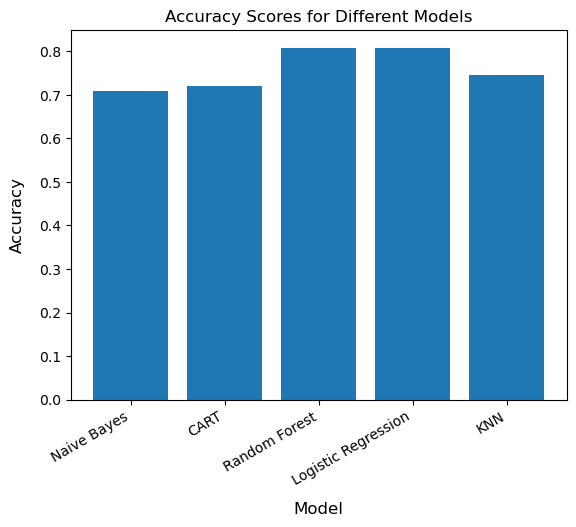

In [347]:
# Create accuracy comparison graph
accs = [acc_mnb, acc_cart, acc_rf, acc_lg, acc_knn]
names = ['Naive Bayes', 'CART', 'Random Forest', 'Logistic Regression', 'KNN']

# Create a bar plot
plt.bar(names, accs)

# Set the title and labels for the plot
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model',fontsize = 12, labelpad=10)
plt.ylabel('Accuracy',fontsize = 12,labelpad=10)
plt.xticks(rotation=30, ha='right')
plt.show()

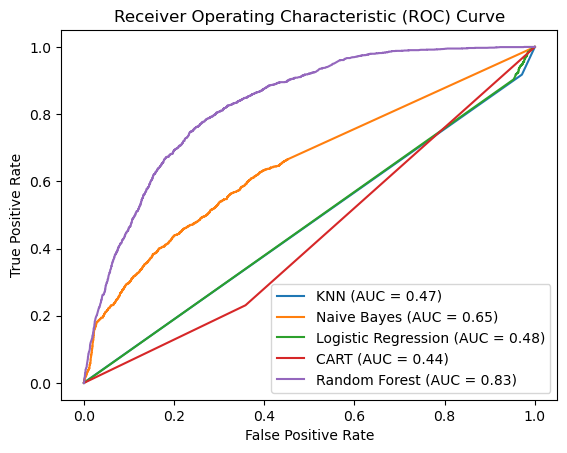

In [353]:
from sklearn.metrics import roc_curve, auc

# Define the models
models = {'KNN': knn,
          'Naive Bayes': nb,
          'Logistic Regression': lg,
          'CART': clf,
          'Random Forest': rf}

# Define the predictor and target variables
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

# Iterate over the models and plot the ROC curve for each
for model_name, model in models.items():
    # Calculate the predicted probabilities for the positive class
    y_score = model.predict_proba(X)[:, 1]
    
    # Compute the ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

